#### Name: Pranav Mehendale
#### Roll No.: TCOD34
#### Batch: T11 

# Assignment 2 Group A

## Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: 
    a. To change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, 
    b. To decrease the skewness and convert the distribution into a normal distribution. 

Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('./random_academic_data.xlsx')
df.head(3)

,RollNo,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6
0,TCOA01,Arjun Verma,9.71,4.14,4.39,6.89,7.56,7.52
1,TCOA02,Isha Shah,6.11,4.62,6.56,5.03,7.72,5.42
2,TCOA03,Riya Nair,4.25,8.48,4.60,5.43,6.88,7.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RollNo  309 non-null    object 
 1   Name    309 non-null    object 
 2   Sem1    309 non-null    float64
 3   Sem2    309 non-null    float64
 4   Sem3    309 non-null    float64
 5   Sem4    309 non-null    float64
 6   Sem5    309 non-null    float64
 7   Sem6    309 non-null    float64
dtypes: float64(6), object(2)
memory usage: 19.4+ KB


In [4]:
df.describe()

,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,7.077476,6.966084,7.108544,6.982233,7.137087,7.014984
std,3.004871,1.835419,2.758916,2.877877,3.817599,1.809959
min,0.960000,4.000000,4.020000,4.000000,4.010000,4.020000
25%,5.660000,5.250000,5.480000,5.390000,5.520000,5.360000
50%,6.770000,7.000000,6.860000,6.750000,6.910000,7.050000
75%,8.300000,8.530000,8.450000,8.410000,8.390000,8.670000
max,50.600000,9.980000,45.300000,47.500000,67.200000,10.000000


In [5]:
for column in df.columns:
    print(column)

RollNo
Name
Sem1
Sem2
Sem3
Sem4
Sem5
Sem6


### Missing Values

In [6]:
df.isna().sum()

RollNo    0
Name      0
Sem1      0
Sem2      0
Sem3      0
Sem4      0
Sem5      0
Sem6      0
dtype: int64

Data has no missing values

RollNo is combination of Year, Dept, Div and number. We can extract Div from it and Number

In [7]:
df['Year'] = df['RollNo'].str[0]+'E'
df['Dept'] = df['RollNo'].str[1:3]+'MP'
df['Div'] = df['RollNo'].str[3]
df.head(5)

,RollNo,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Year,Dept,Div
0,TCOA01,Arjun Verma,9.71,4.14,4.39,6.89,7.56,7.52,TE,COMP,A
1,TCOA02,Isha Shah,6.11,4.62,6.56,5.03,7.72,5.42,TE,COMP,A
2,TCOA03,Riya Nair,4.25,8.48,4.60,5.43,6.88,7.90,TE,COMP,A
3,TCOA04,Sonia Patel,9.09,6.17,9.11,9.25,9.99,7.70,TE,COMP,A
4,TCOA05,Anjali Mittal,5.40,4.29,9.06,5.14,6.70,5.86,TE,COMP,A


Finally replace rollNo with int

In [8]:
df['RollNo'] = df['RollNo'].str[4:].astype(int)
df.head(5)

,RollNo,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Year,Dept,Div
0,1,Arjun Verma,9.71,4.14,4.39,6.89,7.56,7.52,TE,COMP,A
1,2,Isha Shah,6.11,4.62,6.56,5.03,7.72,5.42,TE,COMP,A
2,3,Riya Nair,4.25,8.48,4.60,5.43,6.88,7.90,TE,COMP,A
3,4,Sonia Patel,9.09,6.17,9.11,9.25,9.99,7.70,TE,COMP,A
4,5,Anjali Mittal,5.40,4.29,9.06,5.14,6.70,5.86,TE,COMP,A


In [9]:
df.dtypes

RollNo      int32
Name       object
Sem1      float64
Sem2      float64
Sem3      float64
Sem4      float64
Sem5      float64
Sem6      float64
Year       object
Dept       object
Div        object
dtype: object

## Outliners

<Axes: ylabel='Sem1'>

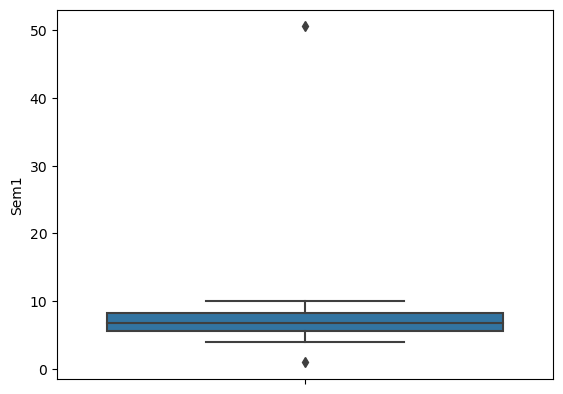

In [10]:
sns.boxplot(y=df['Sem1'])

<Axes: ylabel='Sem1_winsorized'>

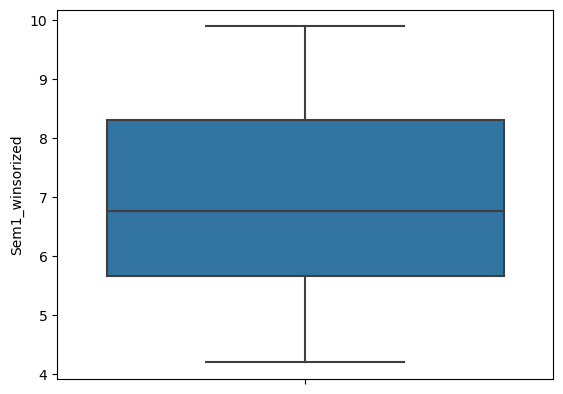

In [11]:
def winsorize(data, lower_percentile, upper_percentile):
  lower = np.percentile(data, lower_percentile)
  upper = np.percentile(data, upper_percentile)
  return np.where(data < lower, lower, np.where(data > upper, upper, data))

df['Sem1_winsorized'] = winsorize(df['Sem1'], 2, 98)
sns.boxplot(y=df['Sem1_winsorized'])

In [12]:
new_df = df.copy()
new_df['diff1'] = new_df['Sem1'] - new_df['Sem1_winsorized']
new_df[new_df['diff1']>10]

,RollNo,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Year,Dept,Div,Sem1_winsorized,diff1
31,32,Yash Kumar,50.6,5.82,8.99,9.03,9.16,4.59,TE,COMP,A,9.8884,40.7116


<Axes: ylabel='Sem2'>

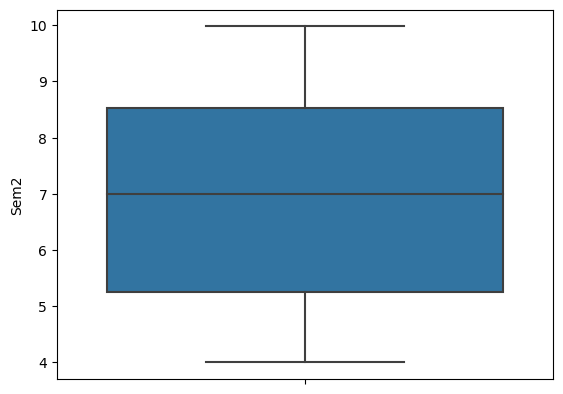

In [13]:
sns.boxplot(y=df['Sem2'])

<Axes: ylabel='Sem3'>

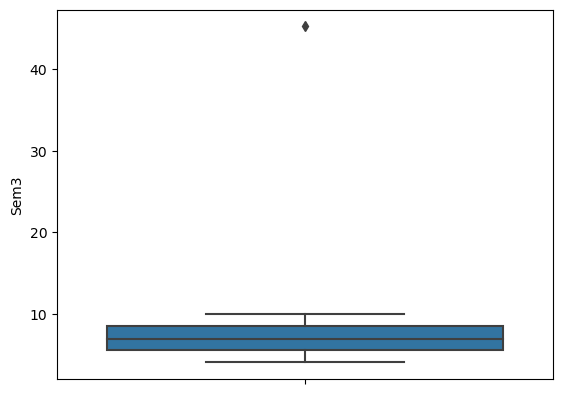

In [14]:
sns.boxplot(y=df['Sem3'])

In [15]:
df['Sem3'] = winsorize(df['Sem3'], 2, 98)

<Axes: ylabel='Sem4'>

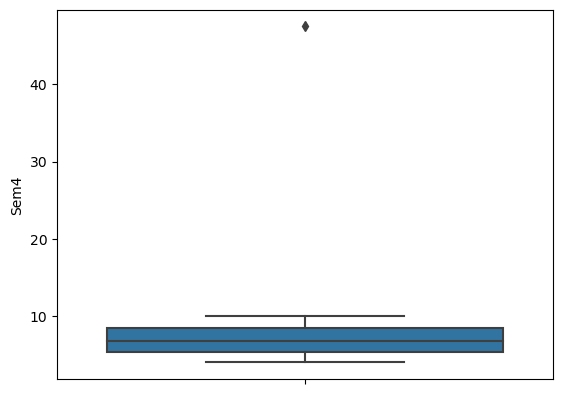

In [16]:
sns.boxplot(y=df['Sem4'])

In [17]:
df['Sem4'] = winsorize(df['Sem4'], 2, 98)

<Axes: ylabel='Sem5'>

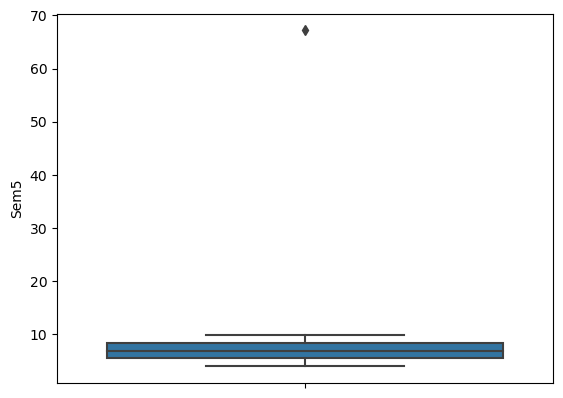

In [18]:
sns.boxplot(y=df['Sem5'])

In [19]:
df['Sem5'] = winsorize(df['Sem5'], 2, 98)

<Axes: ylabel='Sem6'>

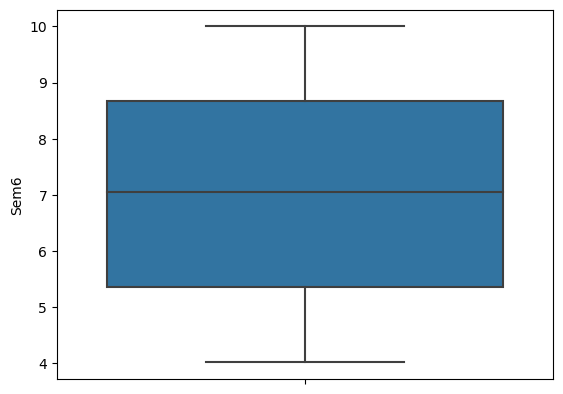

In [20]:
sns.boxplot(y=df['Sem6'])

<Axes: ylabel='RollNo'>

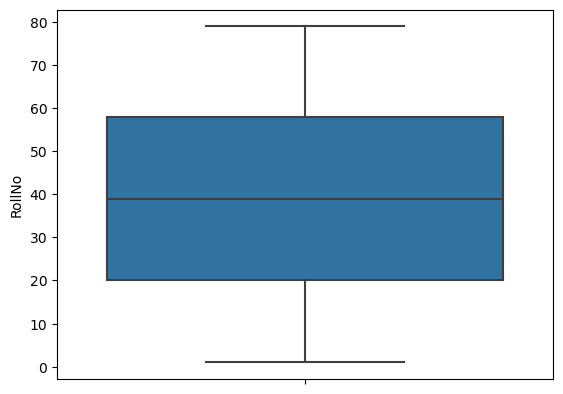

In [21]:
sns.boxplot(y=df['RollNo'])

## Transformation and Scaling

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
le = LabelEncoder()
df['Div'] = le.fit_transform(df['Div'])
df['Div'].value_counts()

Div
2    79
3    79
1    77
0    74
Name: count, dtype: int64

#### Thus we performed all the operation as specified in problem statement.